## STOCK MARKET PREDICTION USING MACHINE LEARNING MODELS



### TEAM NAME: 

           - RANDOM FOREST GUMP


### TEAM MEMBERS: 

           - ADWAYT PRADEEP NADKARNI (adwayt@seas.upenn.edu)
           - DEBADEEPTA TAGORE (tagore@seas.upenn.edu)
           - SHREYAS RAMESH (shreyasr@seas.upenn.edu)

### DATE: 

           - 12th DECEMBER, 2021.


### SUBJECT:

            - MACHINE LEARNING, CIS 520
            
            
##### THIS IS PYTHON SCRIPT FOR "APPROACH 2". ONE CAN UNCOMMENT AND DOWNLOAD THE DATASET ONTO THEIR LOCAL SYSTEM OR USE THE 3 CSV FILES GIVEN IN THE FOLDER.

### HEADER FILES

In [1]:
# BASIC HEADERS

import yfinance as yf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

import math

import sklearn.model_selection as model_selection
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import r2_score, accuracy_score
from sklearn import metrics
import math

#import bottleneck as bn

In [2]:
# NN HEADERS

In [3]:
# LSTM HEADERS

## DATA ACQUISITION 

     (1) TESLA INC. (TSLA)
     (2) APPLE INC. (APPL)
     (3) JP MORGAN CHASE & CO. (JPM)
     
     
    We use open source data provided to us from Yahoo! Finance through the header file yfinanace which scraps the financial data of the company and time period of our choosing.
    
    We are studying the shares TESLA, APPLE and JP MORGAN CHASE as they are the giants in their field and it is in the investors interest to learn the forecast of these shares. As the code is generalized, it can be reused to study any share.

In [4]:
#tsla = yf.Ticker("TSLA")
#aapl = yf.Ticker("AAPL")
#jpm = yf.Ticker("JPM")

In [5]:
#tsla_dataset = tsla.history(start="2010-01-01", end="2021-11-19")
#aapl_dataset = aapl.history(start="2010-01-01", end="2021-11-19")
#jpm_dataset = jpm.history(start="2010-01-01", end="2021-11-19")

In [6]:
#aapl_dataset

In [7]:
#tsla_dataset

In [8]:
#jpm_dataset

## STORING DATASET ON LOCAL MACHINE

In [9]:
aapl_dataset =  pd.read_csv('Apple_Share.csv')
tsla_dataset = pd.read_csv('Tesla_Share.csv')
jpm_dataset = pd.read_csv('JPM_Share.csv')


aapl_dataset.index = aapl_dataset['Date']
tsla_dataset.index = tsla_dataset['Date']
jpm_dataset.index = jpm_dataset['Date']

In [10]:
#aapl_dataset

In [11]:
#tsla_dataset

In [12]:
#jpm_dataset

## DATA VISUALIZATION OF OUR DATASET

    We analyze the share we are dealing with and check what the relationship of the features and our label, the closing price looks like.

APPLE INC.

Visualizing Apple In. Dataset

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021EE0E67E10>,
      dtype=object)

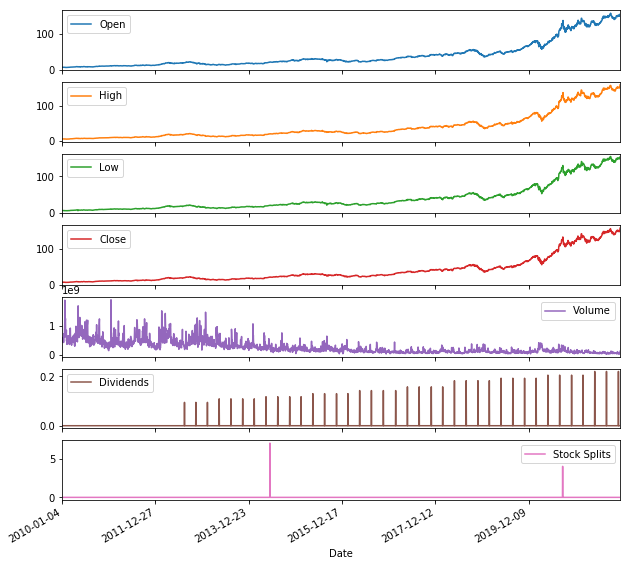

In [13]:
aapl_dataset.plot(kind='line', figsize=(10,10), subplots= True)

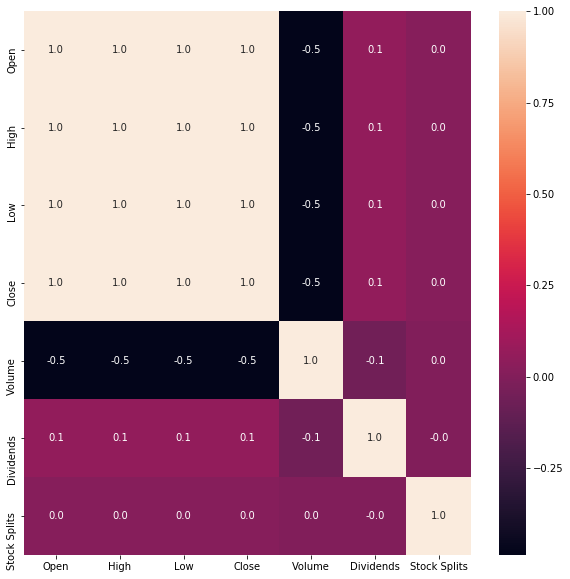

In [14]:
f=plt.subplots(figsize=(10,10))
sns.heatmap(aapl_dataset.corr(),annot=True,fmt='.1f',color='green')

TESLA INC.

Visualizing Tesla Inc. Dataset

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021EE31337F0>,
      dtype=object)

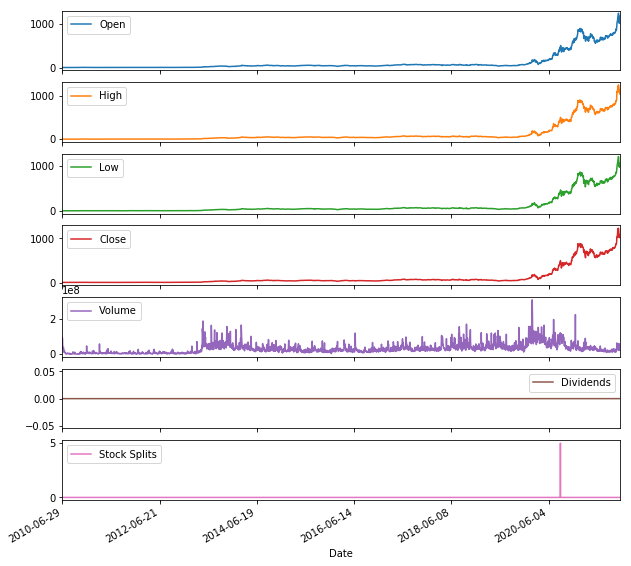

In [15]:
tsla_dataset.plot(kind='line', figsize=(10,10), subplots= True)

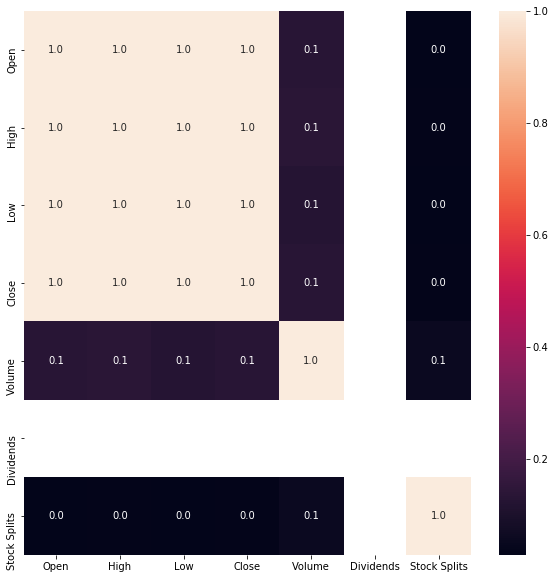

In [16]:
f=plt.subplots(figsize=(10,10))
sns.heatmap(tsla_dataset.corr(),annot=True,fmt='.1f',color='green')

JPMORGAN CHASE & CO

We plot the features that will be used to train our machine learning model (OPEN, HIGH, LOW, VOLUME, DIVIDENDS and STOCK SPLITS)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021EE36020B8>,
      dtype=object)

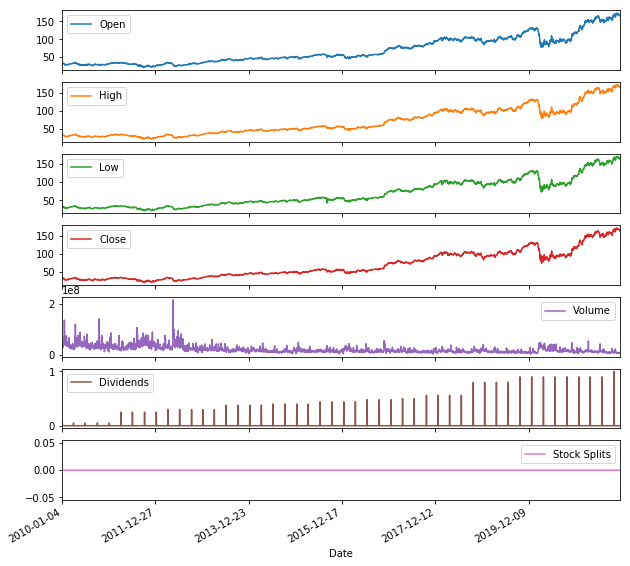

In [17]:
jpm_dataset.plot(kind='line', figsize=(10,10), subplots= True)

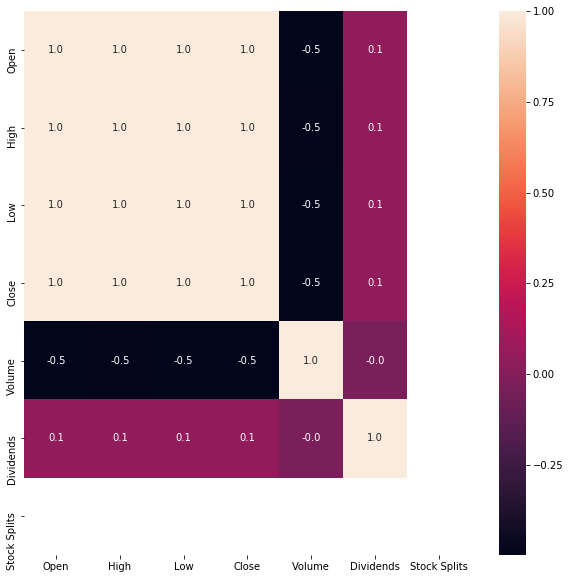

In [18]:
f=plt.subplots(figsize=(10,10))
sns.heatmap(jpm_dataset.corr(),annot=True,fmt='.1f',color='green')

    We see here that the features : OPEN, HIGH, LOW AND CLOSE are highly correlated with each other and hence it would be a bad choice if these features were used to train the model. This prompted us to look for other avenues to generate new features and ultimately get the best possible results.

## CREATING NEW DATASETS

    We recognized the fact that there were 2 ways we could approach this problem. 
    
    The first way was to use previous closing values as features to map or predict the present the closing values.
    
    The second way was to use date as a feature along with the other features mentioned by Yakup Kara(2010). Date can play an important role here as the trends of people buying shares of companies like Apple a few days before black friday or a day when the share is about to make a profit due to high demand of their products can be captured and taught to the model.  

### METHOD 1: USING PRESENT CLOSE VALUES TO PREDICT FUTURE CLOSING VALUES

In [19]:
new_aapl_dataset_1 = pd.DataFrame()
new_tesla_dataset_1 = pd.DataFrame()
new_jpm_dataset_1 = pd.DataFrame()

new_aapl_dataset_1['Close'] = aapl_dataset['Close']
new_jpm_dataset_1['Close'] = jpm_dataset['Close']
new_tesla_dataset_1['Close'] = tsla_dataset['Close']

for i in range(50):
    if i!= 0:
        column_name = 'Close_shift_%d' % (int(i))
        new_aapl_dataset_1[column_name] = aapl_dataset['Close'].shift(int(i))
        new_jpm_dataset_1[column_name] = jpm_dataset['Close'].shift(int(i))
        new_tesla_dataset_1[column_name] = tsla_dataset['Close'].shift(int(i))

new_aapl_dataset_1   

,Close,Close_shift_1,Close_shift_2,Close_shift_3,Close_shift_4,Close_shift_5,Close_shift_6,Close_shift_7,Close_shift_8,Close_shift_9,...,Close_shift_40,Close_shift_41,Close_shift_42,Close_shift_43,Close_shift_44,Close_shift_45,Close_shift_46,Close_shift_47,Close_shift_48,Close_shift_49
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.553025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,6.564354,6.553025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,6.459939,6.564354,6.553025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,6.447998,6.459939,6.564354,6.553025,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,6.490866,6.447998,6.459939,6.564354,6.553025,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-12,149.990005,147.869995,147.919998,150.809998,150.440002,151.279999,150.740005,151.269241,149.801376,148.742920,...,145.847137,148.573151,148.812805,147.904129,149.332062,148.752899,153.845474,154.883957,156.461655,154.075134
2021-11-15,150.000000,149.990005,147.869995,147.919998,150.809998,150.440002,151.279999,150.740005,151.269241,149.801376,...,142.731689,145.847137,148.573151,148.812805,147.904129,149.332062,148.752899,153.845474,154.883957,156.461655
2021-11-16,151.000000,150.000000,149.990005,147.869995,147.919998,150.809998,150.440002,151.279999,150.740005,151.269241,...,143.220963,142.731689,145.847137,148.573151,148.812805,147.904129,149.332062,148.752899,153.845474,154.883957


In [20]:

fut_close_aapl_xtrain = new_aapl_dataset_1.dropna().iloc[:-30,1:]
fut_close_aapl_ytrain = new_aapl_dataset_1.dropna().iloc[:-30,0]
fut_close_aapl_xtest = new_aapl_dataset_1.dropna().iloc[-30:,1:]
fut_close_aapl_ytest = new_aapl_dataset_1.dropna().iloc[-30:,0]

fut_close_tsla_xtrain = new_tesla_dataset_1.dropna().iloc[:-30,1:]
fut_close_tsla_ytrain = new_tesla_dataset_1.dropna().iloc[:-30,0]
fut_close_tsla_xtest = new_tesla_dataset_1.dropna().iloc[-30:,1:]
fut_close_tsla_ytest = new_tesla_dataset_1.dropna().iloc[-30:,0]

fut_close_jpm_xtrain = new_jpm_dataset_1.dropna().iloc[:-30,1:]
fut_close_jpm_ytrain = new_jpm_dataset_1.dropna().iloc[:-30,0]
fut_close_jpm_xtest = new_jpm_dataset_1.dropna().iloc[-30:,1:]
fut_close_jpm_ytest = new_jpm_dataset_1.dropna().iloc[-30:,0]




from sklearn.preprocessing import MinMaxScaler

sc1 = MinMaxScaler()
fut_close_aapl_xtrain = sc1.fit_transform(fut_close_aapl_xtrain)
fut_close_aapl_xtest = sc1.transform(fut_close_aapl_xtest)

sc2 = MinMaxScaler()
fut_close_tsla_xtrain = sc2.fit_transform(fut_close_tsla_xtrain)
fut_close_tsla_xtest = sc2.transform(fut_close_tsla_xtest)

sc3 = MinMaxScaler()
fut_close_jpm_xtrain = sc3.fit_transform(fut_close_jpm_xtrain)
fut_close_jpm_xtest = sc3.transform(fut_close_jpm_xtrain)


### METHOD 2: Using features explained by Yakup Kara (2010) and Date 

 #### RESETTING INDEX

In [21]:
aapl_dataset = aapl_dataset.iloc[:,1:].reset_index()
tsla_dataset = tsla_dataset.iloc[:,1:].reset_index()
jpm_dataset = jpm_dataset.iloc[:,1:].reset_index()

In [22]:
#aapl_dataset

In [23]:
#tsla_dataset

In [24]:
#jpm_dataset

#### FEATURE 1: SIMPLE MOVING AVERAGE

In [25]:
new_aapl_dataset = pd.DataFrame()

new_aapl_dataset['Date'] = aapl_dataset['Date'] 
new_aapl_dataset['SMA_10'] = aapl_dataset.iloc[:,4].rolling(window=10).mean()

In [26]:
new_tsla_dataset = pd.DataFrame()

new_tsla_dataset['Date'] = tsla_dataset['Date']
new_tsla_dataset['SMA_10'] = tsla_dataset.iloc[:,4].rolling(window=10).mean()

In [27]:
new_jpm_dataset = pd.DataFrame()

new_jpm_dataset['Date'] = jpm_dataset['Date']
new_jpm_dataset['SMA_10'] = jpm_dataset.iloc[:,4].rolling(window=10).mean()

In [28]:
#new_aapl_dataset

In [29]:
#new_tsla_dataset

In [30]:
#new_jpm_dataset

#### FEATURE 2: WEIGHTED MOVING AVERAGE

In [31]:
weights = np.arange(1,11) #array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

new_aapl_dataset['WMA_10'] = aapl_dataset.iloc[:,4].rolling(10).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
new_tsla_dataset['WMA_10'] = tsla_dataset.iloc[:,4].rolling(10).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
new_jpm_dataset['WMA_10'] = jpm_dataset.iloc[:,4].rolling(10).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)

In [32]:
#new_aapl_dataset

In [33]:
#new_tsla_dataset

In [34]:
#new_jpm_dataset

#### FEATURE 3: MOMENTUM 5

In [35]:
momentum = aapl_dataset.iloc[:,4].rolling(5).apply(lambda prices: prices[4] - prices[0], raw=True)
new_aapl_dataset['Momentum_5'] = momentum

In [36]:
momentum = tsla_dataset.iloc[:,4].rolling(5).apply(lambda prices: prices[4] - prices[0], raw=True)
new_tsla_dataset['Momentum_5'] = momentum

In [37]:
momentum = jpm_dataset.iloc[:,4].rolling(5).apply(lambda prices: prices[4] - prices[0], raw=True)
new_jpm_dataset['Momentum_5'] = momentum

In [38]:
#new_aapl_dataset

In [39]:
#new_tsla_dataset

In [40]:
#new_jpm_dataset

#### FEATURE 4: STOCHASTIC K%D

In [41]:
high_10 = aapl_dataset['High'].rolling(10).max()
low_10 = aapl_dataset['Low'].rolling(10).min()

new_aapl_dataset['%K'] = (aapl_dataset.iloc[:,4] - low_10)*100/(high_10 - low_10)
new_aapl_dataset['%D'] = new_aapl_dataset['%K'].rolling(window=5).mean()

In [42]:
high_10 = tsla_dataset['High'].rolling(10).max()
low_10 = tsla_dataset['Low'].rolling(10).min()

new_tsla_dataset['%K'] = (tsla_dataset.iloc[:,4] - low_10)*100/(high_10 - low_10)
new_tsla_dataset['%D'] = new_tsla_dataset['%K'].rolling(window=5).mean()

In [43]:
high_10 = jpm_dataset['High'].rolling(10).max()
low_10 = jpm_dataset['Low'].rolling(10).min()

new_jpm_dataset['%K'] = (jpm_dataset.iloc[:,4] - low_10)*100/(high_10 - low_10)
new_jpm_dataset['%D'] = new_jpm_dataset['%K'].rolling(window=5).mean()

In [44]:
#new_aapl_dataset

In [45]:
#new_tsla_dataset

In [46]:
#new_jpm_dataset

#### FEATURE 5: RELATIVE STRENGTH INDEX

In [47]:
difference = aapl_dataset.iloc[:,4].diff()
up = difference.clip(lower=0)
down = -1*difference.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()  # Exponential weighted mean, com - Specify decay in terms of center of mass
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up/ema_down

new_aapl_dataset['RSI'] = 100 - (100/(1 + rs))

In [48]:
difference = tsla_dataset.iloc[:,4].diff()
up = difference.clip(lower=0)
down = -1*difference.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()  # Exponential weighted mean, com - Specify decay in terms of center of mass
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up/ema_down

new_tsla_dataset['RSI'] = 100 - (100/(1 + rs))

In [49]:
difference = jpm_dataset.iloc[:,4].diff()
up = difference.clip(lower=0)
down = -1*difference.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()  # Exponential weighted mean, com - Specify decay in terms of center of mass
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up/ema_down

new_jpm_dataset['RSI'] = 100 - (100/(1 + rs))

In [50]:
#new_aapl_dataset

In [51]:
#new_tsla_dataset

In [52]:
#new_jpm_dataset

#### FEATURE 6: MOVING AVERAGE CONVERGENCE DIVERGENCE

In [53]:
exp1 = aapl_dataset["Close"].ewm(span=12, adjust=False).mean()
exp2 = aapl_dataset["Close"].ewm(span=26, adjust=False).mean()
macd = exp1-exp2


new_aapl_dataset['MACD'] = (macd) - ( macd.ewm(span=9, adjust=False).mean() )

In [54]:
exp1 = tsla_dataset["Close"].ewm(span=12, adjust=False).mean()
exp2 = tsla_dataset["Close"].ewm(span=26, adjust=False).mean()
macd = exp1-exp2


new_tsla_dataset['MACD'] = (macd) - ( macd.ewm(span=9, adjust=False).mean() )

In [55]:
exp1 = jpm_dataset["Close"].ewm(span=12, adjust=False).mean()
exp2 = jpm_dataset["Close"].ewm(span=26, adjust=False).mean()
macd = exp1-exp2


new_jpm_dataset['MACD'] = (macd) - ( macd.ewm(span=9, adjust=False).mean() )

In [56]:
#new_aapl_dataset

In [57]:
#new_tsla_dataset

In [58]:
#new_jpm_dataset

#### FEATURE 7:  WILLIAM'S % R

In [59]:
def get_wr(high, low, close, lookback):
    highh = high.rolling(lookback).max() 
    lowl = low.rolling(lookback).min()
    wr = -100 * ((highh - close) / (highh - lowl))
    return wr

new_aapl_dataset['wr_14'] = get_wr(aapl_dataset['High'], aapl_dataset['Low'], aapl_dataset['Close'], 10)

In [60]:
new_tsla_dataset['wr_14'] = get_wr(tsla_dataset['High'], tsla_dataset['Low'], tsla_dataset['Close'], 10)

In [61]:
new_jpm_dataset['wr_14'] = get_wr(jpm_dataset['High'], jpm_dataset['Low'], jpm_dataset['Close'], 10)

In [62]:
#new_aapl_dataset

In [63]:
#new_tsla_dataset

In [64]:
#new_jpm_dataset

#### FEATURE 8: COMMODITY CHANNEL INDEX

In [65]:
def CCI(close, high, low, n, constant): 
    TP = (high + low + close) / 3 
    CCI = pd.Series((TP - TP.rolling(n).mean()) / (constant * TP.rolling(n).std()), name = 'CCI_' + str(n)) 
    return CCI

In [66]:
new_aapl_dataset['CCI'] = CCI(aapl_dataset['Close'], aapl_dataset['High'], aapl_dataset['Low'], 10, 0.015)

In [67]:
new_tsla_dataset['CCI'] = CCI(tsla_dataset['Close'], tsla_dataset['High'], tsla_dataset['Low'], 10, 0.015)

In [68]:
new_jpm_dataset['CCI'] = CCI(jpm_dataset['Close'], jpm_dataset['High'], jpm_dataset['Low'], 10, 0.015)

In [69]:
#new_aapl_dataset

In [70]:
#new_tsla_dataset

In [71]:
#new_jpm_dataset

#### FEATURE 9: VOLUME

In [72]:
new_aapl_dataset['Volume'] = aapl_dataset['Volume']
new_tsla_dataset['Volume'] = tsla_dataset['Volume']
new_jpm_dataset['Volume'] = jpm_dataset['Volume']

In [73]:
import datetime

# ---------------------------------------------------------------------------------
# GENERATE APPLE DATASET

new_aapl_dataset['Date'] = pd.to_datetime(new_aapl_dataset['Date'])
new_aapl_dataset['Year'] = new_aapl_dataset['Date'].dt.year
new_aapl_dataset['Month'] = new_aapl_dataset['Date'].dt.month
new_aapl_dataset['Day'] = new_aapl_dataset['Date'].dt.day
#print(new_aapl_dataset)
new_aapl_dataset['Day_of_week'] = new_aapl_dataset['Date'].dt.dayofweek
new_aapl_dataset['Day_of_year'] = new_aapl_dataset['Date'].dt.dayofyear
new_aapl_dataset['is_month_start'] = new_aapl_dataset['Date'].dt.is_month_start
new_aapl_dataset['is_month_end'] = new_aapl_dataset['Date'].dt.is_month_end
new_aapl_dataset['is_quarter_start'] = new_aapl_dataset['Date'].dt.is_quarter_start
new_aapl_dataset['is_quarter_end'] = new_aapl_dataset['Date'].dt.is_quarter_end
new_aapl_dataset['is_quarter_start'] = new_aapl_dataset['Date'].dt.is_quarter_start
new_aapl_dataset['is_quarter_start'] = new_aapl_dataset['Date'].dt.is_quarter_start
new_aapl_dataset['is_quarter_start'] = new_aapl_dataset['Date'].dt.is_quarter_start


# ----------------------------------------------------------------------------------------
# GENERATE TESLA DATASET

new_tsla_dataset['Date'] = pd.to_datetime(new_tsla_dataset['Date'])
new_tsla_dataset['Year'] = new_tsla_dataset['Date'].dt.year
new_tsla_dataset['Month'] = new_tsla_dataset['Date'].dt.month
new_tsla_dataset['Day'] = new_tsla_dataset['Date'].dt.day
#print(new_aapl_dataset)
new_tsla_dataset['Day_of_week'] = new_tsla_dataset['Date'].dt.dayofweek
new_tsla_dataset['Day_of_year'] = new_tsla_dataset['Date'].dt.dayofyear
new_tsla_dataset['is_month_start'] = new_tsla_dataset['Date'].dt.is_month_start
new_tsla_dataset['is_month_end'] = new_tsla_dataset['Date'].dt.is_month_end
new_tsla_dataset['is_quarter_start'] = new_tsla_dataset['Date'].dt.is_quarter_start
new_tsla_dataset['is_quarter_end'] = new_tsla_dataset['Date'].dt.is_quarter_end
new_tsla_dataset['is_quarter_start'] = new_tsla_dataset['Date'].dt.is_quarter_start
new_tsla_dataset['is_quarter_start'] = new_tsla_dataset['Date'].dt.is_quarter_start
new_tsla_dataset['is_quarter_start'] = new_tsla_dataset['Date'].dt.is_quarter_start

# -----------------------------------------------------------------------------------------
# GENERATE JPM DATASET

new_jpm_dataset['Date'] = pd.to_datetime(new_jpm_dataset['Date'])
new_jpm_dataset['Year'] = new_jpm_dataset['Date'].dt.year
new_jpm_dataset['Month'] = new_jpm_dataset['Date'].dt.month
new_jpm_dataset['Day'] = new_jpm_dataset['Date'].dt.day
#print(new_aapl_dataset)
new_jpm_dataset['Day_of_week'] = new_jpm_dataset['Date'].dt.dayofweek
new_jpm_dataset['Day_of_year'] = new_jpm_dataset['Date'].dt.dayofyear
new_jpm_dataset['is_month_start'] = new_jpm_dataset['Date'].dt.is_month_start
new_jpm_dataset['is_month_end'] = new_jpm_dataset['Date'].dt.is_month_end
new_jpm_dataset['is_quarter_start'] = new_jpm_dataset['Date'].dt.is_quarter_start
new_jpm_dataset['is_quarter_end'] = new_jpm_dataset['Date'].dt.is_quarter_end
new_jpm_dataset['is_quarter_start'] = new_jpm_dataset['Date'].dt.is_quarter_start
new_jpm_dataset['is_quarter_start'] = new_jpm_dataset['Date'].dt.is_quarter_start
new_jpm_dataset['is_quarter_start'] = new_jpm_dataset['Date'].dt.is_quarter_start


### VISUALIZATION OF NEW DATA

Text(0.5,1,'Correlation between the generated features and closing price of APPLE INC.')

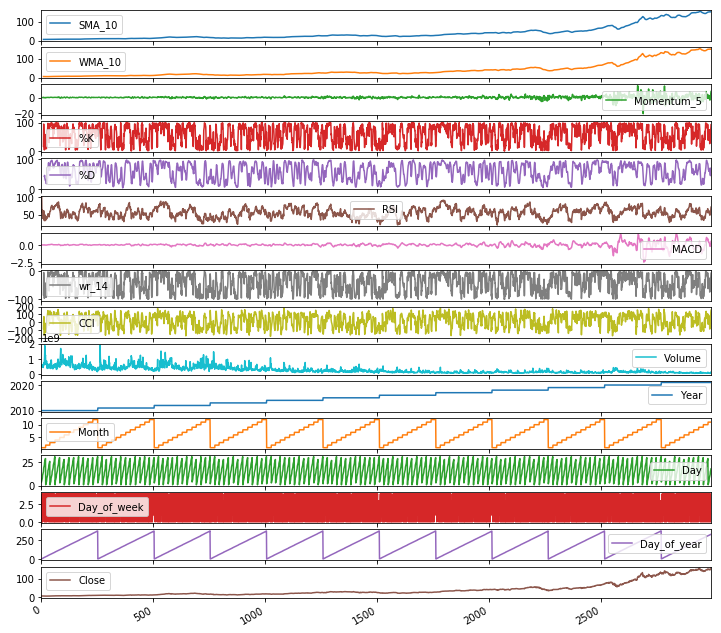

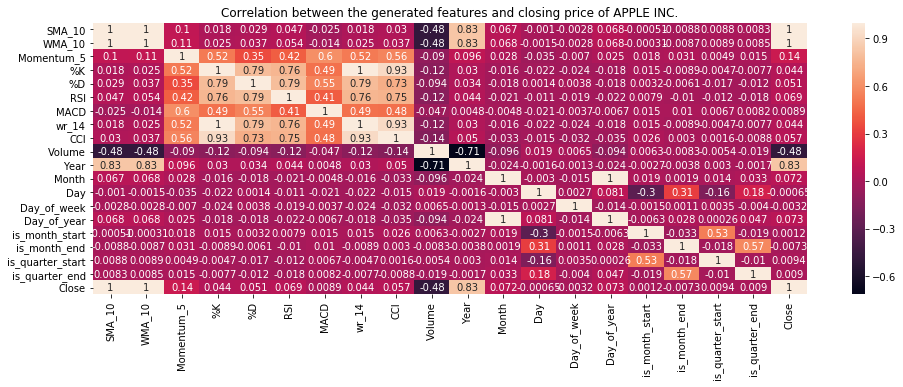

In [74]:
dummy = new_aapl_dataset
dummy['Close'] = aapl_dataset['Close']

dummy.iloc[:,1:].plot(kind='line', figsize=(12,12), subplots= True)

plt.figure(figsize = (16,5))
sns.heatmap(dummy.corr(),annot=True)
plt.title('Correlation between the generated features and closing price of APPLE INC.')

Text(0.5,1,'Correlation between the generated features and closing price of TESLA INC.')

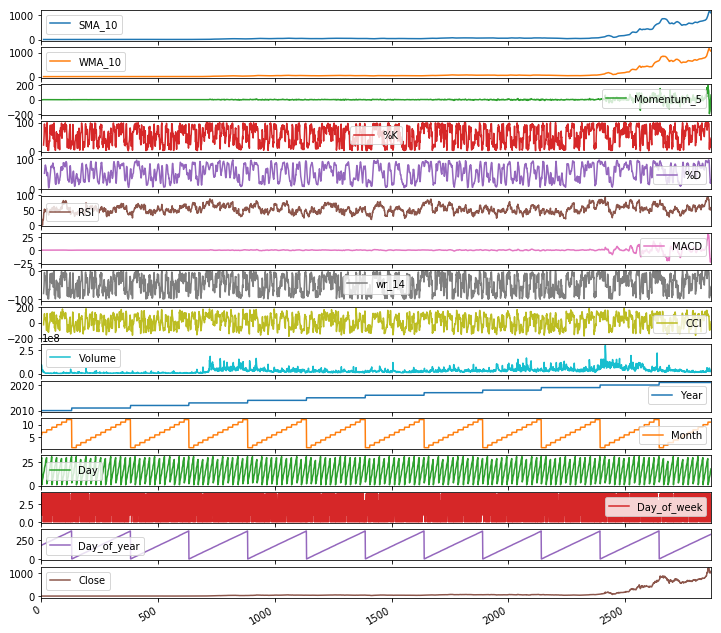

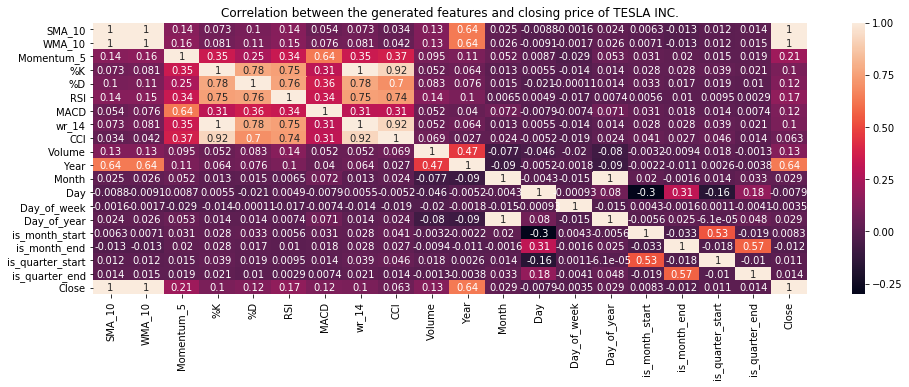

In [75]:
dummy = new_tsla_dataset
dummy['Close'] = tsla_dataset['Close']


dummy.iloc[:,1:].plot(kind='line', figsize=(12,12), subplots= True)


plt.figure(figsize = (16,5))
sns.heatmap(dummy.corr(),annot=True)
plt.title('Correlation between the generated features and closing price of TESLA INC.')

In [76]:
new_aapl_dataset

,Date,SMA_10,WMA_10,Momentum_5,%K,%D,RSI,MACD,wr_14,CCI,...,Year,Month,Day,Day_of_week,Day_of_year,is_month_start,is_month_end,is_quarter_start,is_quarter_end,Close
0,2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,2010,1,4,0,4,False,False,False,False,6.553025
1,2010-01-05,NaN,NaN,NaN,NaN,NaN,100.000000,0.000723,NaN,NaN,...,2010,1,5,1,5,False,False,False,False,6.564354
2,2010-01-06,NaN,NaN,NaN,NaN,NaN,58.515048,-0.005527,NaN,NaN,...,2010,1,6,2,6,False,False,False,False,6.459939
3,2010-01-07,NaN,NaN,NaN,NaN,NaN,55.670847,-0.009906,NaN,NaN,...,2010,1,7,3,7,False,False,False,False,6.447998
4,2010-01-08,NaN,NaN,-0.062159,NaN,NaN,62.683554,-0.009362,NaN,NaN,...,2010,1,8,4,8,False,False,False,False,6.490866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,2021-11-12,149.886354,149.707516,-0.449997,53.089839,47.533204,54.976422,-0.191909,-46.910161,-38.004017,...,2021,11,12,4,316,False,False,False,False,149.990005
2988,2021-11-15,150.012062,149.728179,-0.809998,53.301235,45.620768,55.003932,-0.172629,-46.698765,20.182721,...,2021,11,15,0,319,False,False,False,False,150.000000
2989,2021-11-16,150.131924,149.907804,3.080002,74.452483,46.842323,57.783391,-0.097918,-25.547517,26.331195,...,2021,11,16,1,320,False,False,False,False,151.000000
2990,2021-11-17,150.354001,150.518365,5.620010,79.920297,57.720228,63.782527,0.102929,-20.079703,130.098796,...,2021,11,17,2,321,False,False,False,False,153.490005


Text(0.5,1,'Correlation between the generated features and closing price between JPMORGAN CHASE & CO.')

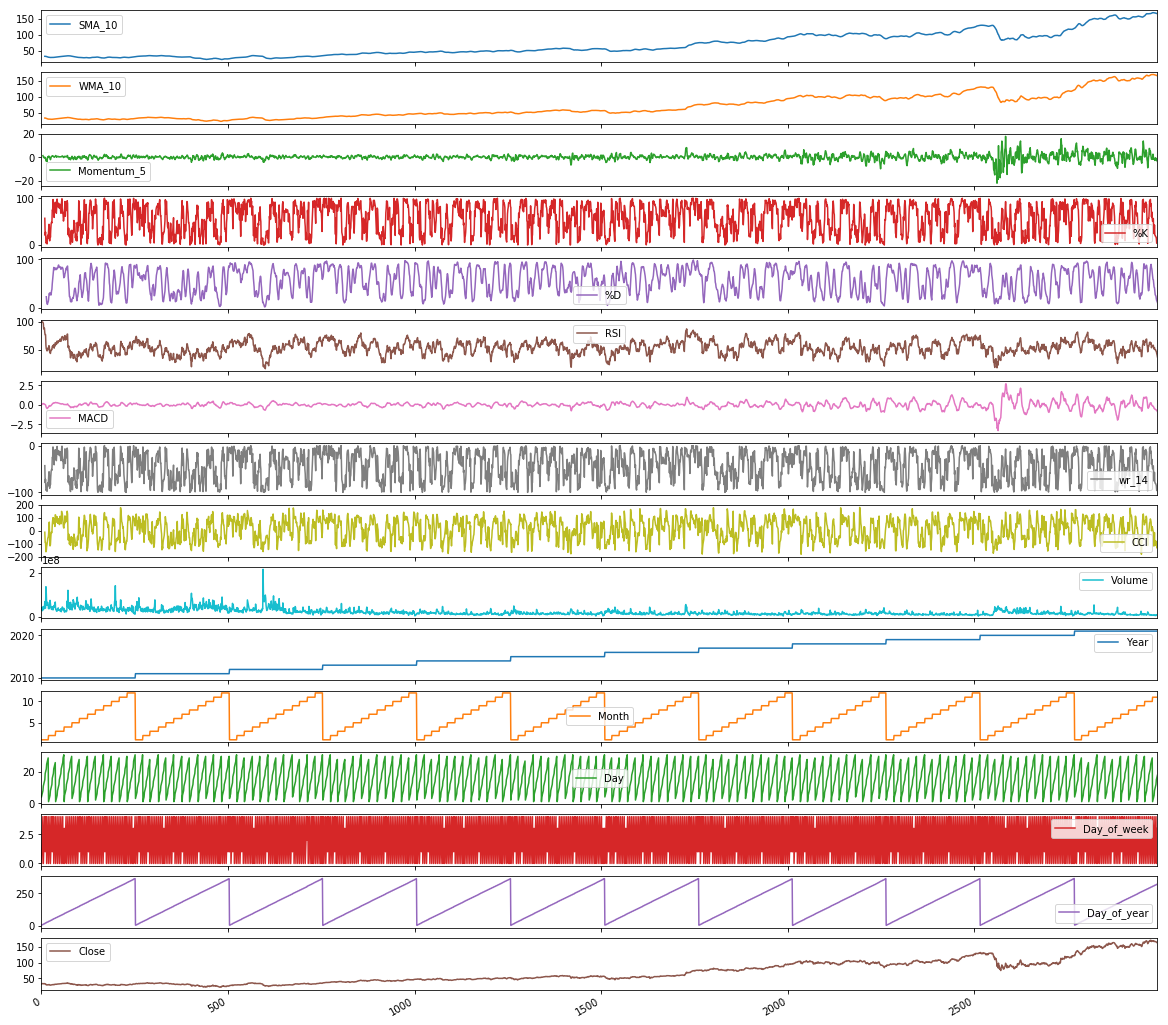

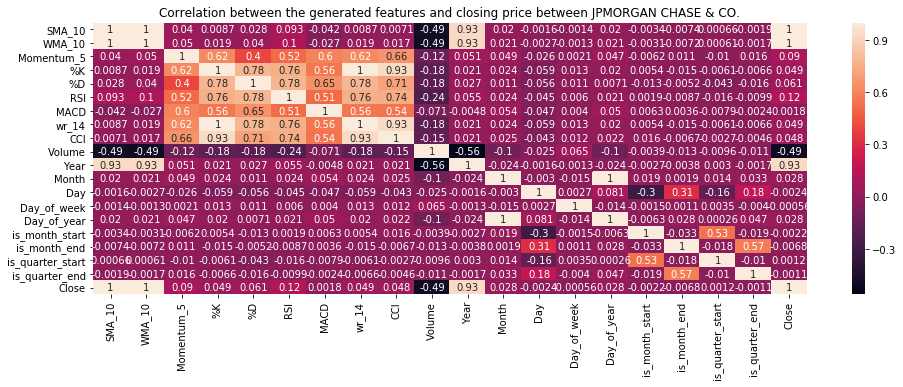

In [77]:
dummy = new_jpm_dataset
dummy['Close'] = jpm_dataset['Close']

dummy.iloc[:,1:].plot(kind='line', figsize=(20,20), subplots= True)

plt.figure(figsize = (16,5))
sns.heatmap(dummy.corr(),annot=True)
plt.title('Correlation between the generated features and closing price between JPMORGAN CHASE & CO.')

In [78]:
new_aapl_dataset['Close'] = aapl_dataset['Close']
new_tsla_dataset['Close'] = tsla_dataset['Close']
new_jpm_dataset['Close'] = jpm_dataset['Close']

## REMOVING NAN VALUES

In [79]:
aapl_dataset = new_aapl_dataset.dropna()

In [80]:
tsla_dataset = new_tsla_dataset.dropna()

In [81]:
jpm_dataset = new_jpm_dataset.dropna()

In [82]:
# MAKING CSV FILES OF THE NEW GENERATED DATASET
#aapl_dataset.to_csv('Apple_Generated_Feature.csv')
#tsla_dataset.to_csv('Tesla_Generated_Feature.csv')
#jpm_dataset.to_csv('JPM_Generated_Feature.csv')

## SPLIT INTO X_TRAIN AND Y_TRAIN

    At this point, we have generated our datasets and now we split them into training and testing datasets to test our model and tabulate the metrics of each model in order to conclude which model performed best

## USING 2021 DATA AS THE TEST DATA

In [83]:
Start = '2021-10-01'
End = '2021-11-19'
aapl_dataset['Date'] = pd.to_datetime(aapl_dataset['Date'], dayfirst=True)
mask = (aapl_dataset['Date'] > Start) & (aapl_dataset['Date'] <= End)
aapl_2021_data = aapl_dataset.loc[mask]
#aapl_2021_data

c:\users\adwayt\anaconda3\envs\gcuda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
Start = '2010-01-01'
End = '2021-09-30'
aapl_dataset['Date'] = pd.to_datetime(aapl_dataset['Date'], dayfirst=True)
mask = (aapl_dataset['Date'] > Start) & (aapl_dataset['Date'] <= End)
aapl_training_dataset = aapl_dataset.loc[mask]
#aapl_training_dataset

c:\users\adwayt\anaconda3\envs\gcuda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [85]:
#-------------------------------------------------------------------------------------------------#

In [86]:
Start = '2021-10-01'
End = '2021-11-19'
tsla_dataset['Date'] = pd.to_datetime(tsla_dataset['Date'], dayfirst=True)
mask = (tsla_dataset['Date'] > Start) & (tsla_dataset['Date'] <= End)
tsla_2021_data = tsla_dataset.loc[mask]
#tsla_2021_data

c:\users\adwayt\anaconda3\envs\gcuda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [87]:
Start = '2010-01-01'
End = '2021-09-30'
tsla_dataset['Date'] = pd.to_datetime(tsla_dataset['Date'], dayfirst=True)
mask = (tsla_dataset['Date'] > Start) & (tsla_dataset['Date'] <= End)
tsla_training_dataset = tsla_dataset.loc[mask]
#tsla_training_dataset

c:\users\adwayt\anaconda3\envs\gcuda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
#-------------------------------------------------------------------------------------------------#

In [89]:
Start = '2021-10-01'
End = '2021-11-19'
jpm_dataset['Date'] = pd.to_datetime(jpm_dataset['Date'], dayfirst=True)
mask = (jpm_dataset['Date'] > Start) & (jpm_dataset['Date'] <= End)
jpm_2021_data = jpm_dataset.loc[mask]
#jpm_2021_data

c:\users\adwayt\anaconda3\envs\gcuda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [90]:
Start = '2010-01-01'
End = '2021-09-30'
jpm_dataset['Date'] = pd.to_datetime(jpm_dataset['Date'], dayfirst=True)
mask = (jpm_dataset['Date'] > Start) & (jpm_dataset['Date'] <= End)
jpm_training_dataset = jpm_dataset.loc[mask]
#jpm_training_dataset

c:\users\adwayt\anaconda3\envs\gcuda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [91]:
# APPLE INC. TRAINING AND TESTING DATA
# PAST SHARE PROPERTIES PREDICT THE FUTURE CLOSE VALUES


x_train_apple = aapl_training_dataset[['SMA_10', 'WMA_10', 'Momentum_5', '%K', '%D', 'RSI', 'MACD', 'wr_14', 'CCI', 'Volume', 'Year', 'Month', 'Day', 'Day_of_week', 'Day_of_year', 'is_month_start', 'is_month_end']].to_numpy()[:-1]
y_train_apple = aapl_training_dataset[['Close']].to_numpy()[1:]


x_test_apple = aapl_2021_data[['SMA_10', 'WMA_10', 'Momentum_5', '%K', '%D', 'RSI', 'MACD', 'wr_14', 'CCI', 'Volume', 'Year', 'Month', 'Day', 'Day_of_week', 'Day_of_year', 'is_month_start', 'is_month_end']].to_numpy()[:-1]
y_test_apple = aapl_2021_data[['Close']].to_numpy()[1:]
apple_test_date = aapl_2021_data[['Date']][1:]


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_apple = sc.fit_transform(x_train_apple)
x_test_apple = sc.transform(x_test_apple)


#y_test.shape

In [92]:
# TESLA INC. TRAINING AND TESTING DATA
# PAST SHARE PROPERTIES PREDICT THE FUTURE CLOSE VALUES


x_train_tesla = tsla_training_dataset[['SMA_10', 'WMA_10', 'Momentum_5', '%K', '%D', 'RSI', 'MACD', 'wr_14', 'CCI', 'Volume', 'Year', 'Month', 'Day', 'Day_of_week', 'Day_of_year', 'is_month_start', 'is_month_end']][:-1]
y_train_tesla = tsla_training_dataset[['Close']][1:]


x_test_tesla = tsla_2021_data[['SMA_10', 'WMA_10', 'Momentum_5', '%K', '%D', 'RSI', 'MACD', 'wr_14', 'CCI', 'Volume', 'Year', 'Month', 'Day', 'Day_of_week', 'Day_of_year', 'is_month_start', 'is_month_end']][:-1]
y_test_tesla = tsla_2021_data[['Close']][1:]
tesla_test_date = tsla_2021_data[['Date']][1:]

x_train_tesla = sc.fit_transform(x_train_tesla)
x_test_tesla = sc.transform(x_test_tesla)

In [93]:
# JPMORGAN CHASE & CO. TRAINING AND TESTING DATA
# PAST SHARE PROPERTIES PREDICT THE FUTURE CLOSE VALUES


x_train_jpm = jpm_training_dataset[['SMA_10', 'WMA_10', 'Momentum_5', '%K', '%D', 'RSI', 'MACD', 'wr_14', 'CCI', 'Volume', 'Year', 'Month', 'Day', 'Day_of_week', 'Day_of_year', 'is_month_start', 'is_month_end']][:-1]
y_train_jpm = jpm_training_dataset[['Close']][1:]


x_test_jpm = jpm_2021_data[['SMA_10', 'WMA_10', 'Momentum_5', '%K', '%D', 'RSI', 'MACD', 'wr_14', 'CCI', 'Volume', 'Year', 'Month', 'Day', 'Day_of_week', 'Day_of_year', 'is_month_start', 'is_month_end']][:-1]
y_test_jpm = jpm_2021_data[['Close']][1:]
# shift -> x_test_jp = x_test_jpm +10
jpm_test_date = jpm_2021_data[['Date']][1:]

x_train_jpm = sc.fit_transform(x_train_jpm)
x_test_jpm = sc.transform(x_test_jpm)


## TRAINING MODEL 1: MULTIPLE LINEAR REGRESSION

### APPLE INC. 

In [239]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [240]:
regressor_apple = LinearRegression()
regressor_apple.fit(x_train_apple, y_train_apple)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

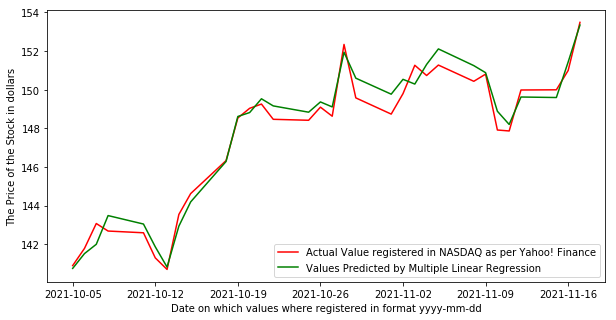

In [241]:
plt.figure(figsize=(10,5))
plt.plot(apple_test_date[:-1], y_test_apple[:-1], color = 'r', label = 'Actual Value registered in NASDAQ as per Yahoo! Finance')
plt.plot(apple_test_date[:-1], regressor_apple.predict(x_test_apple)[1:], color = 'g', label = 'Values Predicted by Multiple Linear Regression')

plt.xlabel('Date on which values where registered in format yyyy-mm-dd')
plt.ylabel('The Price of the Stock in dollars')

plt.legend()
plt.show()

#### METRICS

In [242]:
from sklearn.metrics import r2_score, accuracy_score
from sklearn import metrics
import math

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test_apple, regressor_apple.predict(x_test_apple)))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test_apple, regressor_apple.predict(x_test_apple))) )
print('R Squared Score: ',  r2_score(y_test_apple,regressor_apple.predict(x_test_apple)))

Mean Absolute Error:  1.353394582379668
Root Mean Squared Error:  1.6945942557128273
R Squared Score:  0.8176981888156963


In [243]:
# --------------------------------------------------

In [244]:
regressor_apple = LinearRegression()
regressor_apple.fit(fut_close_aapl_xtrain, fut_close_aapl_ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

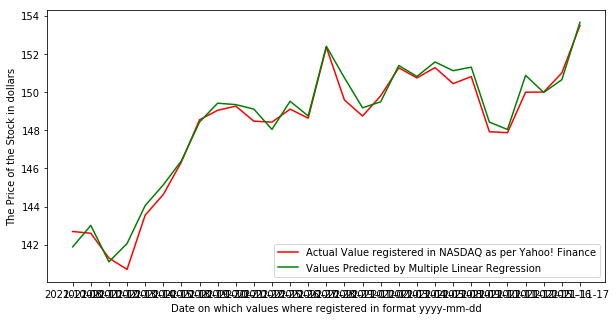

In [245]:
plt.figure(figsize=(10,5))
plt.plot(fut_close_aapl_ytest[:-1], color = 'r', label = 'Actual Value registered in NASDAQ as per Yahoo! Finance')
plt.plot(regressor_apple.predict(fut_close_aapl_xtest)[1:], color = 'g', label = 'Values Predicted by Multiple Linear Regression')

plt.xlabel('Date on which values where registered in format yyyy-mm-dd')
plt.ylabel('The Price of the Stock in dollars')

plt.legend()
plt.show()

### TESLA INC.

In [246]:
regressor_tesla = LinearRegression()
regressor_tesla.fit(x_train_tesla, y_train_tesla)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

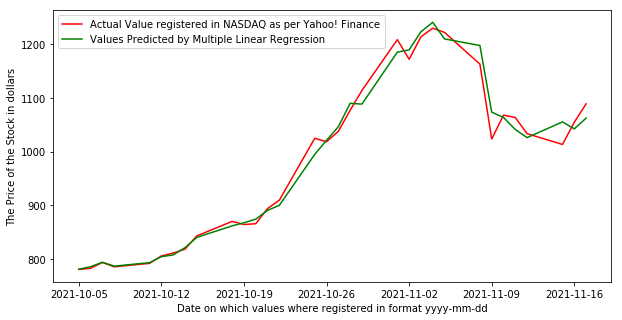

In [247]:
plt.figure(figsize=(10,5))
plt.plot(tesla_test_date[:-1], y_test_tesla[:-1], color = 'r', label = 'Actual Value registered in NASDAQ as per Yahoo! Finance')
plt.plot(tesla_test_date[:-1], regressor_tesla.predict(x_test_tesla)[1:], color = 'g',label = 'Values Predicted by Multiple Linear Regression')

plt.xlabel('Date on which values where registered in format yyyy-mm-dd')
plt.ylabel('The Price of the Stock in dollars')

plt.legend()
plt.show()

#### METRICS

In [248]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test_tesla, regressor_tesla.predict(x_test_tesla)))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test_tesla, regressor_tesla.predict(x_test_tesla))) )
print('R Squared Score: ',  r2_score(y_test_tesla,regressor_tesla.predict(x_test_tesla)))

Mean Absolute Error:  26.68963158278972
Root Mean Squared Error:  46.78131633108441
R Squared Score:  0.9002749251886616


### JPMORGAN CHASE & CO.

In [249]:
regressor_jpm = LinearRegression()
regressor_jpm.fit(x_train_jpm, y_train_jpm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

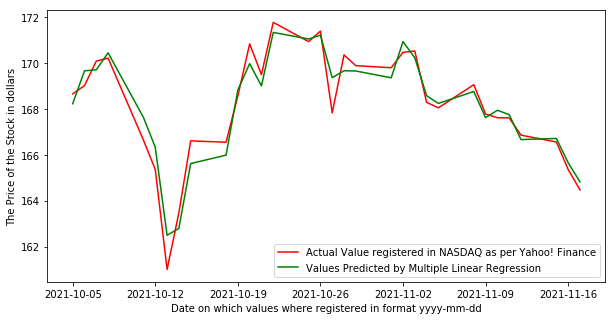

In [250]:
plt.figure(figsize=(10,5))
plt.plot(jpm_test_date[:-1], y_test_jpm[:-1], color = 'r', label = 'Actual Value registered in NASDAQ as per Yahoo! Finance')
plt.plot(jpm_test_date[:-1], regressor_jpm.predict(x_test_jpm)[1:], color = 'g',label = 'Values Predicted by Multiple Linear Regression')

plt.xlabel('Date on which values where registered in format yyyy-mm-dd')
plt.ylabel('The Price of the Stock in dollars')

plt.legend()
plt.show()

In [251]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test_jpm, regressor_jpm.predict(x_test_jpm)))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test_jpm, regressor_jpm.predict(x_test_jpm))) )
print('R Squared Score: ',  r2_score(y_test_jpm,regressor_jpm.predict(x_test_jpm)))

Mean Absolute Error:  1.3958313208785051
Root Mean Squared Error:  1.8848364337564876
R Squared Score:  0.44713408811626176


## TRAINING MODEL 2: RANDOM FOREST REGRESSION

In [252]:
# APPLE

from sklearn.ensemble import RandomForestRegressor

In [253]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train_apple, y_train_apple.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

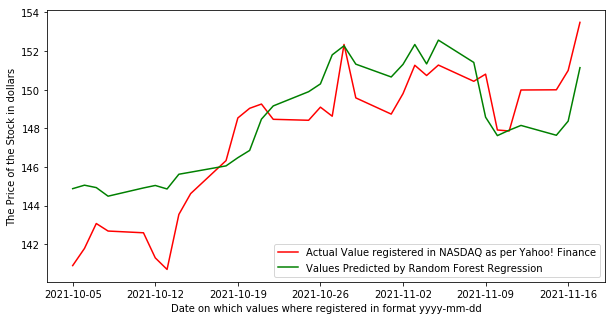

In [254]:

plt.figure(figsize=(10,5))
plt.plot(apple_test_date[:-1], y_test_apple[:-1], color = 'r', label = 'Actual Value registered in NASDAQ as per Yahoo! Finance')
plt.plot(apple_test_date[:-1], regressor.predict(x_test_apple)[1:], color = 'g', label = 'Values Predicted by Random Forest Regression')

plt.xlabel('Date on which values where registered in format yyyy-mm-dd')
plt.ylabel('The Price of the Stock in dollars')

plt.legend()
plt.show()

In [255]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test_apple, regressor.predict(x_test_apple)))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test_apple, regressor.predict(x_test_apple))) )
print('R Squared Score: ',  r2_score(y_test_apple,regressor.predict(x_test_apple)))

Mean Absolute Error:  1.9831770001035764
Root Mean Squared Error:  2.495198854635011
R Squared Score:  0.6047518476842756


In [256]:
# TESLA

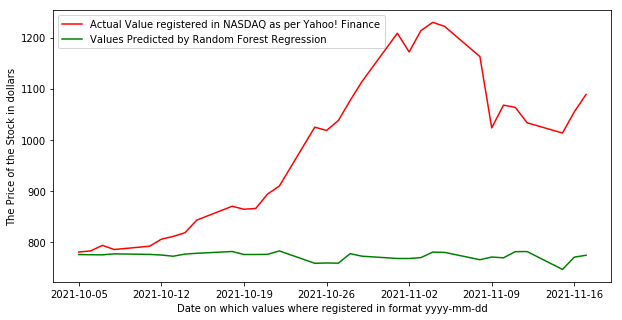

In [257]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train_tesla, y_train_tesla.to_numpy().ravel())

plt.figure(figsize=(10,5))
plt.plot(tesla_test_date[:-1], y_test_tesla[:-1], color = 'r', label = 'Actual Value registered in NASDAQ as per Yahoo! Finance')
plt.plot(tesla_test_date[:-1], regressor.predict(x_test_tesla)[1:], color = 'g', label = 'Values Predicted by Random Forest Regression')

plt.xlabel('Date on which values where registered in format yyyy-mm-dd')
plt.ylabel('The Price of the Stock in dollars')

plt.legend()
plt.show()

In [258]:
#print('Accuracy score: ', regressor.score(x_test_tesla, y_test_tesla))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test_tesla, regressor.predict(x_test_tesla)))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test_tesla, regressor.predict(x_test_tesla))) )
print('R Squared Score: ',  r2_score(y_test_tesla,regressor.predict(x_test_tesla)))

Mean Absolute Error:  213.59436312588775
Root Mean Squared Error:  261.0188168538129
R Squared Score:  -2.1045819537520005


In [259]:
regressor = RandomForestRegressor(n_estimators = 25, random_state = 0, min_samples_split=6)
regressor.fit(x_train_jpm, y_train_jpm.to_numpy().ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

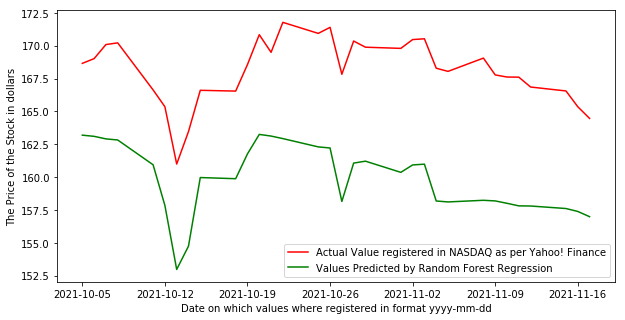

In [260]:
plt.figure(figsize=(10,5))
plt.plot(jpm_test_date[:-1], y_test_jpm[:-1], color = 'r', label = 'Actual Value registered in NASDAQ as per Yahoo! Finance')
plt.plot(jpm_test_date[:-1], regressor.predict(x_test_jpm)[1:], color = 'g', label = 'Values Predicted by Random Forest Regression')

plt.xlabel('Date on which values where registered in format yyyy-mm-dd')
plt.ylabel('The Price of the Stock in dollars')

plt.legend()
plt.show()

In [261]:
#print('Accuracy score: ', regressor.score(x_test_jpm, y_test_jpm))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test_jpm, regressor.predict(x_test_jpm)))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test_jpm, regressor.predict(x_test_jpm))) )
print('R Squared Score: ',  r2_score(y_test_jpm,regressor.predict(x_test_jpm)))

Mean Absolute Error:  8.069809365607588
Root Mean Squared Error:  8.348942609857474
R Squared Score:  -9.84764411935262


## TRAINING MODEL 3: LASSO REGRESSION

In [262]:
from sklearn import linear_model

lassoReg = linear_model.Lasso(alpha=0.001)
lassoReg.fit(x_train_apple, y_train_apple)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

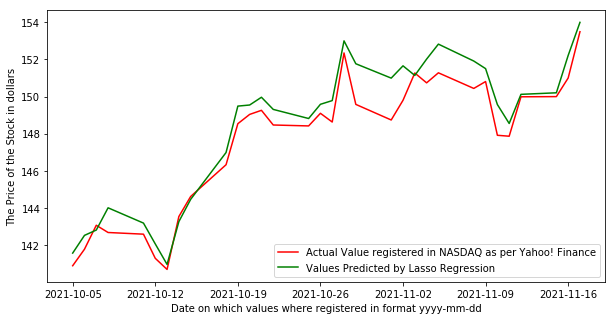

In [263]:
plt.figure(figsize=(10,5))
plt.plot(apple_test_date[:-1], y_test_apple[:-1], color = 'r', label = 'Actual Value registered in NASDAQ as per Yahoo! Finance')
plt.plot(apple_test_date[:-1], lassoReg.predict(x_test_apple)[1:], color = 'g', label = 'Values Predicted by Lasso Regression')

plt.xlabel('Date on which values where registered in format yyyy-mm-dd')
plt.ylabel('The Price of the Stock in dollars')

plt.legend()
plt.show()

In [264]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test_apple, lassoReg.predict(x_test_apple)))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test_apple, lassoReg.predict(x_test_apple))) )
print('R Squared Score: ',  r2_score(y_test_apple,lassoReg.predict(x_test_apple)))

Mean Absolute Error:  1.3738404257785084
Root Mean Squared Error:  1.7244085064883197
R Squared Score:  0.811227017827417


In [265]:
lassoReg = linear_model.Lasso(alpha=0.01)
lassoReg.fit(x_train_tesla, y_train_tesla)

c:\users\adwayt\anaconda3\envs\gcuda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18688.576848908793, tolerance: 9648.935308118223
  positive)


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

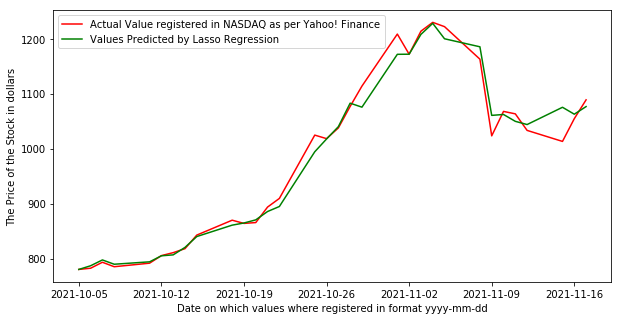

In [266]:
plt.figure(figsize=(10,5))
plt.plot(tesla_test_date[:-1], y_test_tesla[:-1], color = 'r', label = 'Actual Value registered in NASDAQ as per Yahoo! Finance')
plt.plot(tesla_test_date[:-1], lassoReg.predict(x_test_tesla)[1:], color = 'g', label = 'Values Predicted by Lasso Regression')

plt.xlabel('Date on which values where registered in format yyyy-mm-dd')
plt.ylabel('The Price of the Stock in dollars')

plt.legend()
plt.show()

In [267]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test_tesla, lassoReg.predict(x_test_tesla)))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test_tesla, lassoReg.predict(x_test_tesla))) )
print('R Squared Score: ',  r2_score(y_test_tesla,lassoReg.predict(x_test_tesla)))

Mean Absolute Error:  27.901003154174845
Root Mean Squared Error:  47.182402935296395
R Squared Score:  0.8985575789977385


In [268]:
lassoReg = linear_model.Lasso(alpha=0.01)
lassoReg.fit(x_train_jpm, y_train_jpm)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

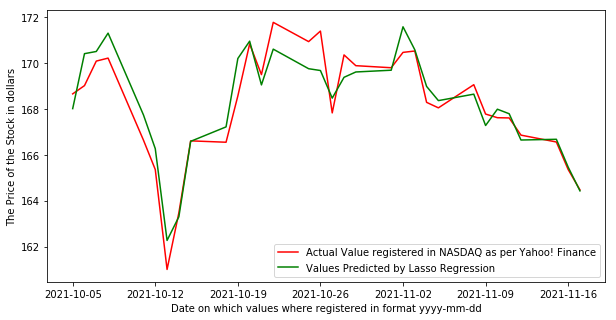

In [269]:
plt.figure(figsize=(10,5))
plt.plot(jpm_test_date[:-1], y_test_jpm[:-1], color = 'r', label = 'Actual Value registered in NASDAQ as per Yahoo! Finance')
plt.plot(jpm_test_date[:-1], lassoReg.predict(x_test_jpm)[1:], color = 'g', label = 'Values Predicted by Lasso Regression')

plt.xlabel('Date on which values where registered in format yyyy-mm-dd')
plt.ylabel('The Price of the Stock in dollars')

plt.legend()
plt.show()

In [270]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test_jpm, lassoReg.predict(x_test_jpm)))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test_jpm, lassoReg.predict(x_test_jpm))) )
print('R Squared Score: ',  r2_score(y_test_jpm,lassoReg.predict(x_test_jpm)))

Mean Absolute Error:  1.4193492583016851
Root Mean Squared Error:  1.9021494216981238
R Squared Score:  0.4369308461282009


## TRAINING MODEL 4: AUTO ML

In [138]:
#!pip install tpot

from tpot import TPOTRegressor

tpot = TPOTRegressor(generations= 10, population_size = 50, verbosity = 2)

tpot.fit(x_train_apple, y_train_apple)
print(tpot.score(x_test_apple, y_test_apple))

c:\users\adwayt\anaconda3\envs\gcuda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Generation 1 - Current best internal CV score: -1.1843484983560322
Generation 2 - Current best internal CV score: -1.1771497166009484
Generation 3 - Current best internal CV score: -1.1771497166009484
Generation 4 - Current best internal CV score: -1.1771497166009484
Generation 5 - Current best internal CV score: -1.1771497166009484
Generation 6 - Current best internal CV score: -1.1771497166009484
Generation 7 - Current best internal CV score: -1.1771497166009484
Generation 8 - Current best internal CV score: -1.1716772748791668
Generation 9 - Current best internal CV score: -1.1716772748791668
Generation 10 - Current best internal CV score: -1.1716772748791668

Best pipeline: LassoLarsCV(RobustScaler(OneHotEncoder(input_matrix, minimum_fraction=0.1, sparse=False, threshold=10)), normalize=False)
-2.8684185473601644


c:\users\adwayt\anaconda3\envs\gcuda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


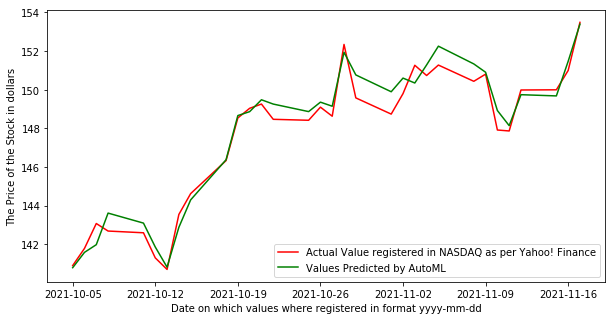

In [139]:
plt.figure(figsize=(10,5))
plt.plot(apple_test_date[:-1], y_test_apple[:-1], color = 'r', label = 'Actual Value registered in NASDAQ as per Yahoo! Finance')
plt.plot(apple_test_date[:-1], tpot.predict(x_test_apple)[1:], color = 'g', label = 'Values Predicted by AutoML')

plt.xlabel('Date on which values where registered in format yyyy-mm-dd')
plt.ylabel('The Price of the Stock in dollars')

plt.legend()
plt.show()

In [140]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test_apple, tpot.predict(x_test_apple)))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test_apple, tpot.predict(x_test_apple))) )
print('R Squared Score: ',  r2_score(y_test_apple,tpot.predict(x_test_apple)))

Mean Absolute Error:  1.3512207990545577
Root Mean Squared Error:  1.6936406193051006
R Squared Score:  0.8179033125220128


### As per Auto-ML, TPOT analysis, after 10 generations or epochs of training with a population size of 50 at every generation and a verbosity of 2, the best model obtained was a mixed combination of Linear SVR and LassoLarsCV for APPLE INC.

In [141]:
tpot = TPOTRegressor(generations= 10, population_size = 50, verbosity = 2)

tpot.fit(x_train_tesla, y_train_tesla)
print(tpot.score(x_test_tesla, y_test_tesla))

c:\users\adwayt\anaconda3\envs\gcuda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Generation 1 - Current best internal CV score: -64.94904321418458
Generation 2 - Current best internal CV score: -64.94904321418458
Generation 3 - Current best internal CV score: -64.84296055520801
Generation 4 - Current best internal CV score: -64.70446873738206
Generation 5 - Current best internal CV score: -64.70446873738206
Generation 6 - Current best internal CV score: -64.2473470857529
Generation 7 - Current best internal CV score: -64.2473470857529
Generation 8 - Current best internal CV score: -64.02138057103132
Generation 9 - Current best internal CV score: -64.02138057103132
Generation 10 - Current best internal CV score: -63.406662721413625

Best pipeline: LinearSVR(CombineDFs(StandardScaler(MaxAbsScaler(input_matrix)), StandardScaler(MaxAbsScaler(input_matrix))), C=15.0, dual=True, epsilon=0.1, loss=epsilon_insensitive, tol=1e-05)
-2269.529486320888


c:\users\adwayt\anaconda3\envs\gcuda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


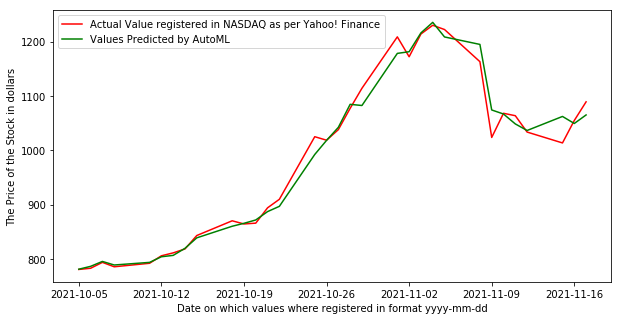

In [142]:
plt.figure(figsize=(10,5))
plt.plot(tesla_test_date[:-1], y_test_tesla[:-1], color = 'r', label = 'Actual Value registered in NASDAQ as per Yahoo! Finance')
plt.plot(tesla_test_date[:-1], tpot.predict(x_test_tesla)[1:], color = 'g', label = 'Values Predicted by AutoML')

plt.xlabel('Date on which values where registered in format yyyy-mm-dd')
plt.ylabel('The Price of the Stock in dollars')

plt.legend()
plt.show()

In [143]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test_tesla, tpot.predict(x_test_tesla)))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test_tesla, tpot.predict(x_test_tesla))) )
print('R Squared Score: ',  r2_score(y_test_tesla,tpot.predict(x_test_tesla)))

Mean Absolute Error:  28.234643962670628
Root Mean Squared Error:  47.63957898975271
R Squared Score:  0.8965821928730867


### As per Auto-ML, TPOT analysis, after 10 generations or epochs of training with a population size of 50 at every generation and a verbosity of 2, the best model obtained was a  LassoLarsCV for TESLA INC.

In [144]:
tpot = TPOTRegressor(generations= 10, population_size = 50, verbosity = 2)

tpot.fit(x_train_jpm, y_train_jpm)
print(tpot.score(x_test_jpm, y_test_jpm))

c:\users\adwayt\anaconda3\envs\gcuda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Generation 1 - Current best internal CV score: -2.0154736045725676
Generation 2 - Current best internal CV score: -1.990919827161901
Generation 3 - Current best internal CV score: -1.990919827161901
Generation 4 - Current best internal CV score: -1.9908093848460418
Generation 5 - Current best internal CV score: -1.9908093848460418
Generation 6 - Current best internal CV score: -1.9908093848460418
Generation 7 - Current best internal CV score: -1.9908093848460418
Generation 8 - Current best internal CV score: -1.9885389611708413
Generation 9 - Current best internal CV score: -1.985028367686907
Generation 10 - Current best internal CV score: -1.985028367686907

Best pipeline: LassoLarsCV(PolynomialFeatures(LassoLarsCV(input_matrix, normalize=True), degree=2, include_bias=False, interaction_only=False), normalize=False)
-3.4102252644031648


c:\users\adwayt\anaconda3\envs\gcuda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### As per Auto-ML, TPOT analysis, after 10 generations or epochs of training with a population size of 50 at every generation and a verbosity of 2, the best model obtained was a mixed combination of LassoLarsCV and ZeroCount for  JPMORGAN & CO.

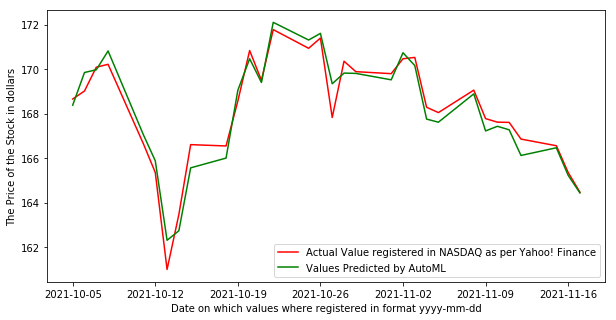

In [145]:
plt.figure(figsize=(10,5))
plt.plot(jpm_test_date[:-1], y_test_jpm[:-1], color = 'r', label = 'Actual Value registered in NASDAQ as per Yahoo! Finance')
plt.plot(jpm_test_date[:-1], tpot.predict(x_test_jpm)[1:], color = 'g', label = 'Values Predicted by AutoML')

plt.xlabel('Date on which values where registered in format yyyy-mm-dd')
plt.ylabel('The Price of the Stock in dollars')

plt.legend()
plt.show()

In [146]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test_jpm, tpot.predict(x_test_jpm)))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test_jpm, tpot.predict(x_test_jpm))) )
print('R Squared Score: ',  r2_score(y_test_jpm,tpot.predict(x_test_jpm)))

Mean Absolute Error:  1.35076550525111
Root Mean Squared Error:  1.8466795240114524
R Squared Score:  0.46929210940402666


## ARTIFICIAL NEURAL NETWORKS

In [95]:
import torch 
import torch.nn as nn 
from torch.utils.data import TensorDataset,DataLoader

In [97]:
y_train_jpm = y_train_jpm#.to_numpy()
y_test_jpm = y_test_jpm#.to_numpy()

train_tensor = torch.tensor(x_train_jpm)
test_tensor = torch.tensor(x_test_jpm)
train_close_tensor = torch.tensor(y_train_jpm.reshape(-1,1))
test_close_tensor = torch.tensor(y_test_jpm.reshape(-1,1))
train_tensor_dataset = TensorDataset(train_tensor,train_close_tensor)
test_tensor_dataset = TensorDataset(test_tensor,test_close_tensor)
train_loader = DataLoader(train_tensor_dataset,batch_size=25,shuffle=False)
test_loader = DataLoader(test_tensor_dataset,batch_size=25,shuffle=False)

In [98]:
for _, (X,y) in enumerate(train_loader):
    print(X.float().shape)
    print(y.shape)

torch.Size([25, 17])
torch.Size([25, 1])
torch.Size([25, 17])
torch.Size([25, 1])
torch.Size([25, 17])
torch.Size([25, 1])
torch.Size([25, 17])
torch.Size([25, 1])
torch.Size([25, 17])
torch.Size([25, 1])
torch.Size([25, 17])
torch.Size([25, 1])
torch.Size([25, 17])
torch.Size([25, 1])
torch.Size([25, 17])
torch.Size([25, 1])
torch.Size([25, 17])
torch.Size([25, 1])
torch.Size([25, 17])
torch.Size([25, 1])
torch.Size([25, 17])
torch.Size([25, 1])
torch.Size([25, 17])
torch.Size([25, 1])
torch.Size([25, 17])
torch.Size([25, 1])
torch.Size([25, 17])
torch.Size([25, 1])
torch.Size([25, 17])
torch.Size([25, 1])
torch.Size([25, 17])
torch.Size([25, 1])
torch.Size([25, 17])
torch.Size([25, 1])
torch.Size([25, 17])
torch.Size([25, 1])
torch.Size([25, 17])
torch.Size([25, 1])
torch.Size([25, 17])
torch.Size([25, 1])
torch.Size([25, 17])
torch.Size([25, 1])
torch.Size([25, 17])
torch.Size([25, 1])
torch.Size([25, 17])
torch.Size([25, 1])
torch.Size([25, 17])
torch.Size([25, 1])
torch.Size([25, 

In [99]:
device = 'cpu'
print('Using {} device'.format(device))

class ANN(nn.Module):
    def __init__(self):
        super(ANN,self).__init__()
        self.linear1 = nn.Linear(in_features=17, out_features= 75, bias=True)
        self.linear2 = nn.Linear(in_features=75,out_features=100,bias=True)
        self.linear3 = nn.Linear(in_features=100, out_features=200, bias=True)
        self.linear4 = nn.Linear(in_features=200, out_features=10, bias=True)
        self.linear5 = nn.Linear(in_features=10, out_features=1, bias=True)
        self.relu = nn.ReLU()

    def forward(self,x):
        # x = torch.flatten(x,1)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        x = self.relu(x)
        x = self.linear4(x)
        x = self.relu(x)
        x = self.linear5(x)
        # x = self.relu(x)
        return x

Using cpu device


In [100]:
import torch.optim as optim

nn_model = ANN().to(device)
nn_model

ANN(
  (linear1): Linear(in_features=17, out_features=75, bias=True)
  (linear2): Linear(in_features=75, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=200, bias=True)
  (linear4): Linear(in_features=200, out_features=10, bias=True)
  (linear5): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [101]:
criterion = nn.MSELoss()
optimizer = optim.Adam(nn_model.parameters(), lr = 1e-3)

overall_step = 0

epochs = 100

train_loss = []
val_loss = []

for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0
    acc = 0
    total = 0
    num_batches = 0
    nn_model.train()
    for _,(X,y) in enumerate(train_loader):
                
        optimizer.zero_grad()
        X = X.float().to(device)
        # print(X)
        y_pred = nn_model(X).to(device)
#         print(y_pred[0])
        y = y.float().to(device)
        loss = criterion(y_pred, y)
        running_loss += loss.item()
        #Backprop
        loss.backward()
        optimizer.step()
        num_batches += 1
    
    running_loss = running_loss / num_batches
    train_loss.append(running_loss)
    
    running_val_loss = 0 
    num_batches = 0
    nn_model.eval().to(device)
    for _,(X,y) in enumerate(test_loader):
        X = X.float().to(device)
        y_pred = nn_model(X).to(device)
        # print(y_pred)
        y = y.float().to(device)
        loss = criterion(y_pred, y)
        running_val_loss += loss.item()
        num_batches += 1

    running_val_loss = running_val_loss/num_batches
    val_loss.append(running_val_loss)

    # print("#################################################################################")
    print('epoch :', epoch)
    print(' train_loss : ', train_loss[epoch])
    print(' val_loss: ',val_loss[epoch])
    # print("#################################################################################")

epoch : 0
 train_loss :  695.3384259110791
 val_loss:  149.46896743774414
epoch : 1
 train_loss :  726.7465902910394
 val_loss:  75.76335334777832
epoch : 2
 train_loss :  130.91314412779727
 val_loss:  160.8537826538086
epoch : 3
 train_loss :  68.80010092460503
 val_loss:  150.4605941772461
epoch : 4
 train_loss :  54.98247518377789
 val_loss:  133.60644149780273
epoch : 5
 train_loss :  45.64091869127952
 val_loss:  113.54912948608398
epoch : 6
 train_loss :  40.094891697673475
 val_loss:  96.0748062133789
epoch : 7
 train_loss :  36.5043292207233
 val_loss:  80.97951889038086
epoch : 8
 train_loss :  33.68285423618252
 val_loss:  69.62322998046875
epoch : 9
 train_loss :  31.141518184694192
 val_loss:  64.00242233276367
epoch : 10
 train_loss :  28.765748714996597
 val_loss:  60.86367988586426
epoch : 11
 train_loss :  26.70718734143144
 val_loss:  60.93643760681152
epoch : 12
 train_loss :  25.271546761868365
 val_loss:  62.24900817871094
epoch : 13
 train_loss :  24.4484245554875

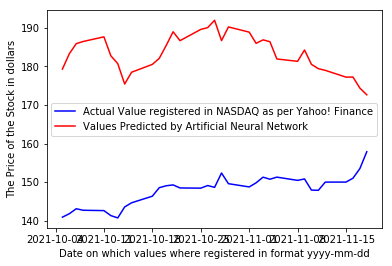

In [102]:
plt.plot(apple_test_date[:],y_test_apple,color='blue', label = 'Actual Value registered in NASDAQ as per Yahoo! Finance')
y_pred = nn_model(test_tensor.float().to(device)).to(device)
plt.plot(apple_test_date[:],y_pred.detach().numpy(),color='red', label = 'Values Predicted by Artificial Neural Network')

plt.xlabel('Date on which values where registered in format yyyy-mm-dd')
plt.ylabel('The Price of the Stock in dollars')

plt.legend()
plt.show()

In [103]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test_apple, y_pred.detach().numpy()))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test_apple, y_pred.detach().numpy())) )
print('R Squared Score: ',  r2_score(y_test_apple,y_pred.detach().numpy()))

Mean Absolute Error:  35.3311152602687
Root Mean Squared Error:  35.94603592721532
R Squared Score:  -81.0278883620555


In [104]:
import torchsummary

In [105]:
nn_model

ANN(
  (linear1): Linear(in_features=17, out_features=75, bias=True)
  (linear2): Linear(in_features=75, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=200, bias=True)
  (linear4): Linear(in_features=200, out_features=10, bias=True)
  (linear5): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)